## Transfer learning tuning and saving best models:

### VGG16:
 * model parameter and other information can be found below:
     * [source](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
     
  * base_model: use vgg16 as base model and freeze at bottleneck layer (stop right before flatten layer). 
  * top_model: tune dense layers (parameters are inspired by the blog source):
     * batch_size 16 seems to work best for small data set 
  * freezed the first 15 layers and fined tuned the last 5 layers (block5 and fully connected layer).
  * extra blog source for callbacks and saving models:
    * [call_backs for best weights](https://machinelearningmastery.com/check-point-deep-learning-models-keras/)
    * [saving models](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

### ResNet50:
  * Use Resnet50 to help further improve accuracy:
      * see [base model info comparison](https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5)
      * [resnet50 blog](https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33)
     
  * base_model: use RESNET50 and freeze at bottleneck layer (stop right before 2D AVERAGE POOL). 
  * top_model: tune dense layers (parameters are inspired by a few sources):
     * [source1](https://www.kaggle.com/suniliitb96/tutorial-keras-transfer-learning-with-resnet50)
     * [source2](https://www.kaggle.com/pmigdal/transfer-learning-with-resnet-50-in-keras)
     * [source3](https://towardsdatascience.com/transfer-learning-for-image-classification-using-keras-c47ccf09c8c8)
  * unfreezed the last 5 layers (after activation48 and fully connected layer).
  
---
#### This cell is required in order to use GPU for running the model 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
# dynamically grow the memory used on the GPU
config.gpu_options.allow_growth = True 
# to log device placement (on which device the operation ran)
# (nothing gets printed in Jupyter, only if you run it standalone)
config.log_device_placement = True  
# set this TensorFlow session as the default session for Keras                                    
sess = tf.Session(config=config)
set_session(sess) 
keras.backend.get_session().run(tf.global_variables_initializer())  

Using TensorFlow backend.
W0908 18:20:20.734452 140119096915776 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0908 18:20:20.735410 140119096915776 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:207: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



---
#### Import necessary libraries:

In [2]:
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# from sklearn.utils import class_weight
# from keras.callbacks import ModelCheckpoint
# from keras import optimizers
import sys
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.vgg16 import VGG16

# from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
# from keras.models import Sequential, Model, model_from_json


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline

#### Load in python files with helper functions:

In [29]:
%load_ext autoreload
%autoreload 1

sys.path.append("../python_files/")

import vgg16_preprocess
import model_tuning
import model_evaluation


%aimport vgg16_preprocess
%aimport model_tuning
%aimport model_evaluation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----
#### Train VGG16 models, save the best weights and show results

In [18]:
# set file_pathsand preprocess functions for hat, beard, and eyewear
file_path1_hat = '../tuning_data/VGG_16_tuning/bottleneck_train_hat.npy'
file_path2_hat = '../tuning_data/VGG_16_tuning/bottleneck_test_hat.npy'
file_path3_hat = '../tuning_data/VGG_16_tuning/top_model_weights_hat.h5'
file_path4_hat = '../tuning_data/VGG_16_tuning/final_weights_hat.h5'
file_path1_beard = '../tuning_data/VGG_16_tuning/bottleneck_train_beard.npy'
file_path2_beard = '../tuning_data/VGG_16_tuning/bottleneck_test_beard.npy'
file_path3_beard = '../tuning_data/VGG_16_tuning/top_model_weights_beard.h5'
file_path4_beard = '../tuning_data/VGG_16_tuning/final_weights_beard.h5'
file_path1_eyewear = '../tuning_data/VGG_16_tuning/bottleneck_train_eyewear.npy'
file_path2_eyewear = '../tuning_data/VGG_16_tuning/bottleneck_test_eyewear.npy'
file_path3_eyewear = '../tuning_data/VGG_16_tuning/top_model_weights_eyewear.h5'
file_path4_eyewear = '../tuning_data/VGG_16_tuning/final_weights_eyewear.h5'
process_func_v = vgg16_preprocess.preprocess_input
vgg16_model_path = '../tuning_data/VGG_16_tuning/model.json'
pickle_file_path = '../pickle_files/pic_df.pkl'

In [6]:
# save and create test and train df for hat, beard, and eyewear for vgg16
train_df_hat_v, test_df_hat_v  = model_tuning.save_bottleneck_features('hat',VGG16,process_func_v,1./255,(150,150),
                                                                       file_path1_hat, file_path2_hat)
train_df_beard_v, test_df_beard_v  = model_tuning.save_bottleneck_features('beard',VGG16,process_func_v,1./255,
                                                                           (150,150), file_path1_beard,
                                                                           file_path2_beard)
train_df_eyewear_v, test_df_eyewear_v  = model_tuning.save_bottleneck_features('eyewear',VGG16,process_func_v,
                                                                               1./255,(150,150),
                                                                               file_path1_eyewear,
                                                                               file_path2_eyewear)

W0908 18:35:03.023334 140119096915776 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0908 18:35:03.024168 140119096915776 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0908 18:35:03.026525 140119096915776 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0908 18:35:03.040036 140119096915776 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Found 522 validated image filenames.
Found 131 validated image filenames.
Found 522 validated image filenames.
Found 131 validated image filenames.
Found 522 validated image filenames.
Found 131 validated image filenames.


In [10]:
# quickly train top models and save best weights for model fine tuning
# hat
print('Tuning vgg16 hat:')
model_tuning.train_top_model(train_df_hat_v, test_df_hat_v,50, 'hat', 'vgg16',
                             1./255, process_func_v, (150,150),
                             file_path1_hat,file_path2_hat, file_path3_hat)
# beard
print('\n\nTuning vgg16 beard:')
model_tuning.train_top_model(train_df_beard_v,test_df_beard_v,50, 'beard', 'vgg16',
                             1./255, process_func_v, (150,150),
                             file_path1_beard, file_path2_beard, file_path3_beard)
# eyewear
print('\n\nTuning vgg16 eyewear:')
model_tuning.train_top_model(train_df_eyewear_v,test_df_eyewear_v, 50, 'eyewear','vgg16',
                             1./2255, process_func_v, (150,150),
                             file_path1_eyewear, file_path2_eyewear, file_path3_eyewear)

Tuning vgg16 hat:
Found 522 validated image filenames belonging to 2 classes.
Found 131 validated image filenames belonging to 2 classes.
Train on 512 samples, validate on 128 samples
Epoch 1/50
512/512 [==============================] - 0s 588us/step - loss: 0.8850 - acc: 0.6426 - val_loss: 0.4112 - val_acc: 0.8516

Epoch 00001: val_acc improved from -inf to 0.85156, saving model to ../tuning_data/VGG_16_tuning/top_model_weights_hat.h5
Epoch 2/50
512/512 [==============================] - 0s 199us/step - loss: 0.2972 - acc: 0.8848 - val_loss: 0.2667 - val_acc: 0.9062

Epoch 00002: val_acc improved from 0.85156 to 0.90625, saving model to ../tuning_data/VGG_16_tuning/top_model_weights_hat.h5
Epoch 3/50
512/512 [==============================] - 0s 210us/step - loss: 0.2076 - acc: 0.9316 - val_loss: 0.2571 - val_acc: 0.8906

Epoch 00003: val_acc did not improve from 0.90625
Epoch 4/50
512/512 [==============================] - 0s 201us/step - loss: 0.1325 - acc: 0.9531 - val_loss: 0.265

512/512 [==============================] - 0s 201us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.5310 - val_acc: 0.8984

Epoch 00042: val_acc did not improve from 0.92969
Epoch 43/50
512/512 [==============================] - 0s 211us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5540 - val_acc: 0.9062

Epoch 00043: val_acc did not improve from 0.92969
Epoch 44/50
512/512 [==============================] - 0s 207us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.5402 - val_acc: 0.9062

Epoch 00044: val_acc did not improve from 0.92969
Epoch 45/50
512/512 [==============================] - 0s 209us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.5420 - val_acc: 0.9062

Epoch 00045: val_acc did not improve from 0.92969
Epoch 46/50
512/512 [==============================] - 0s 200us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.5680 - val_acc: 0.9062

Epoch 00046: val_acc did not improve from 0.92969
Epoch 47/50
512/512 [==============================] - 0s 203us/step - loss: 0.005

512/512 [==============================] - 0s 216us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.5827 - val_acc: 0.8672

Epoch 00034: val_acc did not improve from 0.86719
Epoch 35/50
512/512 [==============================] - 0s 207us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.6111 - val_acc: 0.8594

Epoch 00035: val_acc did not improve from 0.86719
Epoch 36/50
512/512 [==============================] - 0s 205us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6375 - val_acc: 0.8516

Epoch 00036: val_acc did not improve from 0.86719
Epoch 37/50
512/512 [==============================] - 0s 207us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6502 - val_acc: 0.8438

Epoch 00037: val_acc did not improve from 0.86719
Epoch 38/50
512/512 [==============================] - 0s 217us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6335 - val_acc: 0.8672

Epoch 00038: val_acc did not improve from 0.86719
Epoch 39/50
512/512 [==============================] - 0s 213us/step - loss: 0.002

512/512 [==============================] - 0s 209us/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.4404 - val_acc: 0.9062

Epoch 00024: val_acc did not improve from 0.92969
Epoch 25/50
512/512 [==============================] - 0s 200us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.4377 - val_acc: 0.9141

Epoch 00025: val_acc did not improve from 0.92969
Epoch 26/50
512/512 [==============================] - 0s 201us/step - loss: 0.0065 - acc: 1.0000 - val_loss: 0.4410 - val_acc: 0.9141

Epoch 00026: val_acc did not improve from 0.92969
Epoch 27/50
512/512 [==============================] - 0s 201us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.4587 - val_acc: 0.9062

Epoch 00027: val_acc did not improve from 0.92969
Epoch 28/50
512/512 [==============================] - 0s 202us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 0.4695 - val_acc: 0.9062

Epoch 00028: val_acc did not improve from 0.92969
Epoch 29/50
512/512 [==============================] - 0s 202us/step - loss: 0.004

In [16]:
# fine tune models and save best weights for final model
# hat
print('Tuning vgg16 hat:')
model_result_hat = model_tuning.fine_tune_model(train_df_hat_v,test_df_hat_v,50,'hat','vgg16',
                                150,1./255,process_func_v,file_path3_hat, file_path4_hat)
# beard
print('\n\nTuning vgg16 beard:')
model_result_beard = model_tuning.fine_tune_model(train_df_beard_v,test_df_beard_v,50,'beard','vgg16',
                                150,1./255,process_func_v,file_path3_beard, file_path4_beard)
# eyewear
print('\n\nTuning vgg16 eyewear:')
model_result_eyewear = model_tuning.fine_tune_model(train_df_eyewear_v,test_df_eyewear_v,50,'eyewear','vgg16',
                                150,1./255,process_func_v,file_path3_eyewear, file_path4_eyewear)



Tuning vgg16 eyewear:
Found 522 validated image filenames belonging to 2 classes.
Found 131 validated image filenames belonging to 2 classes.
Epoch 1/50
32/32 [==============================] - 5s 150ms/step - loss: 0.3652 - acc: 0.8484 - val_loss: 0.2973 - val_acc: 0.8984

Epoch 00001: val_acc improved from -inf to 0.89844, saving model to ../tuning_data/VGG_16_tuning/final_weights_eyewear.h5
Epoch 2/50
32/32 [==============================] - 5s 168ms/step - loss: 0.3493 - acc: 0.8621 - val_loss: 0.2669 - val_acc: 0.9304

Epoch 00002: val_acc improved from 0.89844 to 0.93043, saving model to ../tuning_data/VGG_16_tuning/final_weights_eyewear.h5
Epoch 3/50
32/32 [==============================] - 5s 163ms/step - loss: 0.3331 - acc: 0.8398 - val_loss: 0.2196 - val_acc: 0.9478

Epoch 00003: val_acc improved from 0.93043 to 0.94783, saving model to ../tuning_data/VGG_16_tuning/final_weights_eyewear.h5
Epoch 4/50
32/32 [==============================] - 5s 157ms/step - loss: 0.3008 - ac

32/32 [==============================] - 4s 134ms/step - loss: 0.1320 - acc: 0.9512 - val_loss: 0.1860 - val_acc: 0.9391

Epoch 00043: val_acc did not improve from 0.97391
Epoch 44/50
32/32 [==============================] - 5s 153ms/step - loss: 0.1584 - acc: 0.9395 - val_loss: 0.1700 - val_acc: 0.9478

Epoch 00044: val_acc did not improve from 0.97391
Epoch 45/50
32/32 [==============================] - 4s 139ms/step - loss: 0.1226 - acc: 0.9512 - val_loss: 0.2259 - val_acc: 0.9391

Epoch 00045: val_acc did not improve from 0.97391
Epoch 46/50
32/32 [==============================] - 5s 141ms/step - loss: 0.1280 - acc: 0.9453 - val_loss: 0.1875 - val_acc: 0.9453

Epoch 00046: val_acc did not improve from 0.97391
Epoch 47/50
32/32 [==============================] - 5s 163ms/step - loss: 0.1075 - acc: 0.9570 - val_loss: 0.2342 - val_acc: 0.9217

Epoch 00047: val_acc did not improve from 0.97391
Epoch 48/50
32/32 [==============================] - 5s 152ms/step - loss: 0.1093 - acc: 0.9

Check vgg16 hat model result:


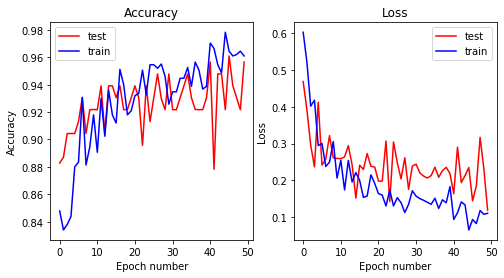



 Check vgg16 beard model result:


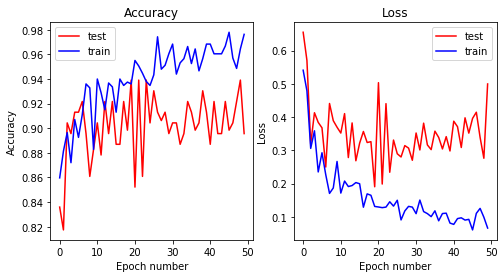



 Check vgg16 eyewear model result:


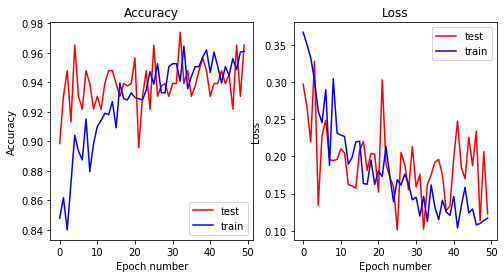

In [20]:
# save model, we only need to save one model as they are the same model architecture
model_evaluation.save_model(model_result_hat, vgg16_model_path)
# plot model accuracy and loss curves with each epoch 
# hat
print('Check vgg16 hat model result:')
model_evaluation.plot_model_result(model_result_hat)
# beard
print('\n\n Check vgg16 beard model result:')
model_evaluation.plot_model_result(model_result_beard)
# eyewear
print('\n\n Check vgg16 eyewear model result:')
model_evaluation.plot_model_result(model_result_eyewear)

vgg16 hat model evaluation:
Found 653 validated image filenames belonging to 2 classes.


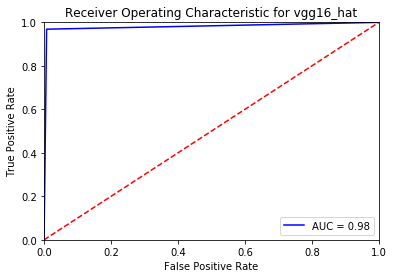

        Pred_0  Pred_1
True_0     395       3
True_1       8     247
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       398
           1       0.99      0.97      0.98       255

    accuracy                           0.98       653
   macro avg       0.98      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653



vgg16 beard model evaluation:
Found 653 validated image filenames belonging to 2 classes.


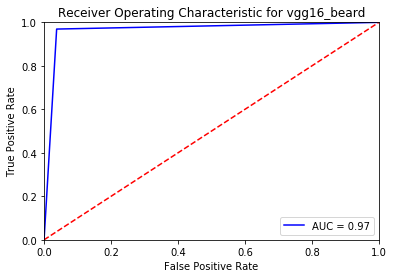

        Pred_0  Pred_1
True_0     410      16
True_1       7     220
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       426
           1       0.93      0.97      0.95       227

    accuracy                           0.96       653
   macro avg       0.96      0.97      0.96       653
weighted avg       0.97      0.96      0.96       653



vgg16 eyewear model evaluation:
Found 653 validated image filenames belonging to 2 classes.


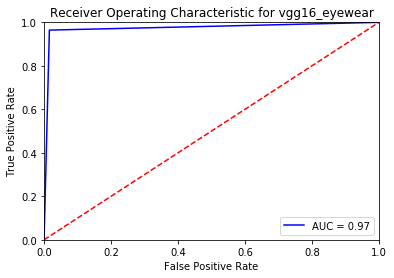

        Pred_0  Pred_1
True_0     311       5
True_1      12     325
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       316
           1       0.98      0.96      0.97       337

    accuracy                           0.97       653
   macro avg       0.97      0.97      0.97       653
weighted avg       0.97      0.97      0.97       653



In [22]:
# test model on entire pic_df 
# hat
print('vgg16 hat model evaluation:')
model_evaluation.model_testing(pickle_file_path,'hat',vgg16_model_path,file_path4_hat,
                              (150,150),1./255,process_func_v, 'vgg16')
# beard
print('\n\nvgg16 beard model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'beard', vgg16_model_path, file_path4_beard,
                              (150,150),1./255, process_func_v, 'vgg16')
# eyewear
print('\n\nvgg16 eyewear model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'eyewear', vgg16_model_path, file_path4_eyewear,
                              (150,150),1./255, process_func_v, 'vgg16')

----
#### Train VGG16 models, save the best weights and show results

In [23]:
# set file_pathsand preprocess functions for hat, beard, and eyewear
file_path1_hat = '../tuning_data/resnet_data/bottleneck_train_hat.npy'
file_path2_hat = '../tuning_data/resnet_data/bottleneck_test_hat.npy'
file_path3_hat = '../tuning_data/resnet_data/top_model_weights_hat.h5'
file_path4_hat = '../tuning_data/resnet_data/final_weights_hat.h5'
file_path1_beard = '../tuning_data/resnet_data/bottleneck_train_beard.npy'
file_path2_beard = '../tuning_data/resnet_data/bottleneck_test_beard.npy'
file_path3_beard = '../tuning_data/resnet_data/top_model_weights_beard.h5'
file_path4_beard = '../tuning_data/resnet_data/final_weights_beard.h5'
file_path1_eyewear = '../tuning_data/resnet_data/bottleneck_train_eyewear.npy'
file_path2_eyewear = '../tuning_data/resnet_data/bottleneck_test_eyewear.npy'
file_path3_eyewear = '../tuning_data/resnet_data/top_model_weights_eyewear.h5'
file_path4_eyewear = '../tuning_data/resnet_data/final_weights_eyewear.h5'
resnet_model_path = '../tuning_data/resnet_data/model.json'
pickle_file_path = '../pickle_files/pic_df.pkl'

In [24]:
# save and create test and train df for hat, beard, and eyewear for vgg16
train_df_hat_r, test_df_hat_r  = model_tuning.save_bottleneck_features('hat',ResNet50,preprocess_input,None,
                                                                       (224,224),file_path1_hat, file_path2_hat)
train_df_beard_r, test_df_beard_r  = model_tuning.save_bottleneck_features('beard',ResNet50,preprocess_input,None,
                                                                           (224,224), file_path1_beard,
                                                                           file_path2_beard)
train_df_eyewear_r, test_df_eyewear_r  = model_tuning.save_bottleneck_features('eyewear',ResNet50,preprocess_input,
                                                                               None,(224,224),
                                                                               file_path1_eyewear,
                                                                               file_path2_eyewear)

W0908 19:13:48.279029 140119096915776 deprecation_wrapper.py:119] From /home/mindy/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Found 522 validated image filenames.
Found 131 validated image filenames.
Found 522 validated image filenames.
Found 131 validated image filenames.
Found 522 validated image filenames.
Found 131 validated image filenames.


In [25]:
# quickly train top models and save best weights for model fine tuning
# hat
print('Tuning resnet50 hat:')
model_tuning.train_top_model(train_df_hat_r, test_df_hat_r,50, 'hat', 'resnet50',
                             None, preprocess_input,(224,224),
                             file_path1_hat,file_path2_hat, file_path3_hat)
# beard
print('\n\nTuning resnet50 beard:')
model_tuning.train_top_model(train_df_beard_r, test_df_beard_r,50, 'beard', 'resnet50',
                             None, preprocess_input,(224,224),
                             file_path1_beard, file_path2_beard, file_path3_beard)
# eyewear
print('\n\nTuning resnet50 eyewear:')
model_tuning.train_top_model(train_df_eyewear_r,test_df_eyewear_r, 50, 'eyewear','resnet50',
                              None, preprocess_input,(224,224),
                             file_path1_eyewear, file_path2_eyewear, file_path3_eyewear)

Tuning resnet50 hat:
Found 522 validated image filenames belonging to 2 classes.
Found 131 validated image filenames belonging to 2 classes.
Train on 512 samples, validate on 128 samples
Epoch 1/50
512/512 [==============================] - 2s 3ms/step - loss: 0.3685 - acc: 0.8613 - val_loss: 0.0574 - val_acc: 0.9766

Epoch 00001: val_acc improved from -inf to 0.97656, saving model to ../tuning_data/resnet_data/top_model_weights_hat.h5
Epoch 2/50
512/512 [==============================] - 0s 331us/step - loss: 0.1785 - acc: 0.9316 - val_loss: 0.0748 - val_acc: 0.9766

Epoch 00002: val_acc did not improve from 0.97656
Epoch 3/50
512/512 [==============================] - 0s 342us/step - loss: 0.1079 - acc: 0.9629 - val_loss: 0.0554 - val_acc: 0.9844

Epoch 00003: val_acc improved from 0.97656 to 0.98438, saving model to ../tuning_data/resnet_data/top_model_weights_hat.h5
Epoch 4/50
512/512 [==============================] - 0s 335us/step - loss: 0.0737 - acc: 0.9766 - val_loss: 0.0745 -

512/512 [==============================] - 0s 341us/step - loss: 2.6006e-04 - acc: 1.0000 - val_loss: 0.0837 - val_acc: 0.9766

Epoch 00043: val_acc did not improve from 0.98438
Epoch 44/50
512/512 [==============================] - 0s 343us/step - loss: 1.8584e-04 - acc: 1.0000 - val_loss: 0.0851 - val_acc: 0.9766

Epoch 00044: val_acc did not improve from 0.98438
Epoch 45/50
512/512 [==============================] - 0s 336us/step - loss: 1.9899e-04 - acc: 1.0000 - val_loss: 0.0860 - val_acc: 0.9766

Epoch 00045: val_acc did not improve from 0.98438
Epoch 46/50
512/512 [==============================] - 0s 347us/step - loss: 1.7035e-04 - acc: 1.0000 - val_loss: 0.0864 - val_acc: 0.9766

Epoch 00046: val_acc did not improve from 0.98438
Epoch 47/50
512/512 [==============================] - 0s 342us/step - loss: 1.4090e-04 - acc: 1.0000 - val_loss: 0.0840 - val_acc: 0.9766

Epoch 00047: val_acc did not improve from 0.98438
Epoch 48/50
512/512 [==============================] - 0s 338u

512/512 [==============================] - 0s 277us/step - loss: 6.1749e-04 - acc: 1.0000 - val_loss: 0.4070 - val_acc: 0.9141

Epoch 00033: val_acc did not improve from 0.92188
Epoch 34/50
512/512 [==============================] - 0s 282us/step - loss: 5.1653e-04 - acc: 1.0000 - val_loss: 0.4068 - val_acc: 0.9141

Epoch 00034: val_acc did not improve from 0.92188
Epoch 35/50
512/512 [==============================] - 0s 272us/step - loss: 4.4750e-04 - acc: 1.0000 - val_loss: 0.3894 - val_acc: 0.9062

Epoch 00035: val_acc did not improve from 0.92188
Epoch 36/50
512/512 [==============================] - 0s 274us/step - loss: 3.9131e-04 - acc: 1.0000 - val_loss: 0.4074 - val_acc: 0.9062

Epoch 00036: val_acc did not improve from 0.92188
Epoch 37/50
512/512 [==============================] - 0s 271us/step - loss: 4.2914e-04 - acc: 1.0000 - val_loss: 0.4135 - val_acc: 0.9141

Epoch 00037: val_acc did not improve from 0.92188
Epoch 38/50
512/512 [==============================] - 0s 271u

512/512 [==============================] - 0s 279us/step - loss: 8.4463e-04 - acc: 1.0000 - val_loss: 0.3269 - val_acc: 0.9453

Epoch 00024: val_acc did not improve from 0.95312
Epoch 25/50
512/512 [==============================] - 0s 280us/step - loss: 7.5356e-04 - acc: 1.0000 - val_loss: 0.3229 - val_acc: 0.9453

Epoch 00025: val_acc did not improve from 0.95312
Epoch 26/50
512/512 [==============================] - 0s 275us/step - loss: 8.1469e-04 - acc: 1.0000 - val_loss: 0.3093 - val_acc: 0.9531

Epoch 00026: val_acc did not improve from 0.95312
Epoch 27/50
512/512 [==============================] - 0s 278us/step - loss: 6.9833e-04 - acc: 1.0000 - val_loss: 0.3112 - val_acc: 0.9531

Epoch 00027: val_acc did not improve from 0.95312
Epoch 28/50
512/512 [==============================] - 0s 281us/step - loss: 6.1122e-04 - acc: 1.0000 - val_loss: 0.3142 - val_acc: 0.9531

Epoch 00028: val_acc did not improve from 0.95312
Epoch 29/50
512/512 [==============================] - 0s 277u

In [26]:
# fine tune models and save best weights for final model
# hat
print('Tuning resnet50 hat:')
model_result_hat = model_tuning.fine_tune_model(train_df_hat_r,test_df_hat_r,50,'hat','resnet50',
                                224,None,preprocess_input,file_path3_hat, file_path4_hat)
# beard
print('\n\nTuning resnet50 beard:')
model_result_beard = model_tuning.fine_tune_model(train_df_beard_r,test_df_beard_r,50,'beard','resnet50',
                                224,None,preprocess_input,file_path3_beard, file_path4_beard)
# eyewear
print('\n\nTuning resnet50 eyewear:')
model_result_eyewear = model_tuning.fine_tune_model(train_df_eyewear_r,test_df_eyewear_r,50,'eyewear','resnet50',
                                224,None,preprocess_input, file_path3_eyewear, file_path4_eyewear)

Tuning resnet50 hat:
Found 522 validated image filenames belonging to 2 classes.
Found 131 validated image filenames belonging to 2 classes.
Epoch 1/50
32/32 [==============================] - 8s 249ms/step - loss: 0.3342 - acc: 0.8629 - val_loss: 0.0796 - val_acc: 0.9688

Epoch 00001: val_acc improved from -inf to 0.96875, saving model to ../tuning_data/resnet_data/final_weights_hat.h5
Epoch 2/50
32/32 [==============================] - 8s 242ms/step - loss: 0.3144 - acc: 0.8516 - val_loss: 0.1094 - val_acc: 0.9478

Epoch 00002: val_acc did not improve from 0.96875
Epoch 3/50
32/32 [==============================] - 8s 246ms/step - loss: 0.2639 - acc: 0.8836 - val_loss: 0.1132 - val_acc: 0.9478

Epoch 00003: val_acc did not improve from 0.96875
Epoch 4/50
32/32 [==============================] - 7s 222ms/step - loss: 0.2460 - acc: 0.9050 - val_loss: 0.0787 - val_acc: 0.9739

Epoch 00004: val_acc improved from 0.96875 to 0.97391, saving model to ../tuning_data/resnet_data/final_weights


Epoch 00043: val_acc did not improve from 0.99130
Epoch 44/50
32/32 [==============================] - 7s 225ms/step - loss: 0.2341 - acc: 0.9059 - val_loss: 0.0429 - val_acc: 0.9826

Epoch 00044: val_acc did not improve from 0.99130
Epoch 45/50
32/32 [==============================] - 7s 228ms/step - loss: 0.2492 - acc: 0.9004 - val_loss: 0.0864 - val_acc: 0.9739

Epoch 00045: val_acc did not improve from 0.99130
Epoch 46/50
32/32 [==============================] - 7s 227ms/step - loss: 0.2201 - acc: 0.8977 - val_loss: 0.0756 - val_acc: 0.9766

Epoch 00046: val_acc did not improve from 0.99130
Epoch 47/50
32/32 [==============================] - 7s 225ms/step - loss: 0.2900 - acc: 0.8707 - val_loss: 0.0746 - val_acc: 0.9739

Epoch 00047: val_acc did not improve from 0.99130
Epoch 48/50
32/32 [==============================] - 8s 240ms/step - loss: 0.2488 - acc: 0.9043 - val_loss: 0.0375 - val_acc: 0.9913

Epoch 00048: val_acc did not improve from 0.99130
Epoch 49/50
32/32 [==========

32/32 [==============================] - 7s 229ms/step - loss: 0.1921 - acc: 0.9277 - val_loss: 0.2291 - val_acc: 0.9062

Epoch 00037: val_acc did not improve from 0.93913
Epoch 38/50
32/32 [==============================] - 8s 241ms/step - loss: 0.1568 - acc: 0.9316 - val_loss: 0.2018 - val_acc: 0.9130

Epoch 00038: val_acc did not improve from 0.93913
Epoch 39/50
32/32 [==============================] - 7s 222ms/step - loss: 0.1874 - acc: 0.9333 - val_loss: 0.2654 - val_acc: 0.8957

Epoch 00039: val_acc did not improve from 0.93913
Epoch 40/50
32/32 [==============================] - 7s 228ms/step - loss: 0.1483 - acc: 0.9355 - val_loss: 0.1591 - val_acc: 0.9304

Epoch 00040: val_acc did not improve from 0.93913
Epoch 41/50
32/32 [==============================] - 7s 216ms/step - loss: 0.1454 - acc: 0.9414 - val_loss: 0.2403 - val_acc: 0.9130

Epoch 00041: val_acc did not improve from 0.93913
Epoch 42/50
32/32 [==============================] - 7s 222ms/step - loss: 0.1969 - acc: 0.9

32/32 [==============================] - 8s 241ms/step - loss: 0.2289 - acc: 0.9121 - val_loss: 0.2392 - val_acc: 0.9391

Epoch 00029: val_acc did not improve from 0.96522
Epoch 30/50
32/32 [==============================] - 7s 225ms/step - loss: 0.1587 - acc: 0.9411 - val_loss: 0.2359 - val_acc: 0.9391

Epoch 00030: val_acc did not improve from 0.96522
Epoch 31/50
32/32 [==============================] - 7s 220ms/step - loss: 0.1712 - acc: 0.9316 - val_loss: 0.1871 - val_acc: 0.9304

Epoch 00031: val_acc did not improve from 0.96522
Epoch 32/50
32/32 [==============================] - 7s 218ms/step - loss: 0.1366 - acc: 0.9422 - val_loss: 0.2089 - val_acc: 0.9652

Epoch 00032: val_acc did not improve from 0.96522
Epoch 33/50
32/32 [==============================] - 7s 231ms/step - loss: 0.1798 - acc: 0.9238 - val_loss: 0.1891 - val_acc: 0.9304

Epoch 00033: val_acc did not improve from 0.96522
Epoch 34/50
32/32 [==============================] - 7s 222ms/step - loss: 0.1769 - acc: 0.9

Check resnet hat model result:


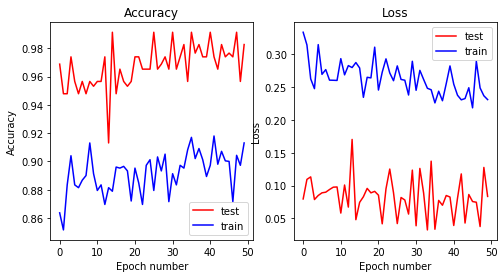



 Check resnet beard model result:


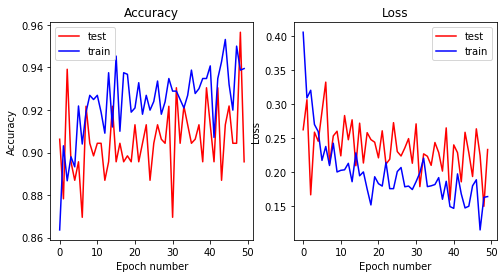



 Check resnet eyewear model result:


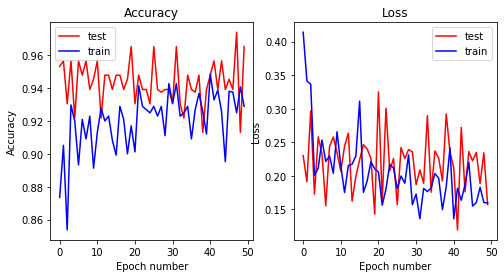

In [27]:
# save model, we only need to save one model as they are the same model architecture
model_evaluation.save_model(model_result_hat, resnet_model_path)
# plot model accuracy and loss curves with each epoch 
# hat
print('Check resnet hat model result:')
model_evaluation.plot_model_result(model_result_hat)
# beard
print('\n\n Check resnet beard model result:')
model_evaluation.plot_model_result(model_result_beard)
# eyewear
print('\n\n Check resnet eyewear model result:')
model_evaluation.plot_model_result(model_result_eyewear)

resnet50 hat model evaluation:
Found 653 validated image filenames belonging to 2 classes.


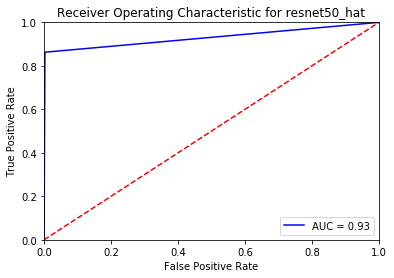

        Pred_0  Pred_1
True_0     397       1
True_1      35     220
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       398
           1       1.00      0.86      0.92       255

    accuracy                           0.94       653
   macro avg       0.96      0.93      0.94       653
weighted avg       0.95      0.94      0.94       653



resnet50 beard model evaluation:
Found 653 validated image filenames belonging to 2 classes.


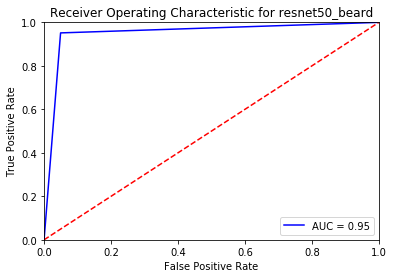

        Pred_0  Pred_1
True_0     405      21
True_1      11     216
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       426
           1       0.91      0.95      0.93       227

    accuracy                           0.95       653
   macro avg       0.94      0.95      0.95       653
weighted avg       0.95      0.95      0.95       653



resnet50 eyewear model evaluation:
Found 653 validated image filenames belonging to 2 classes.


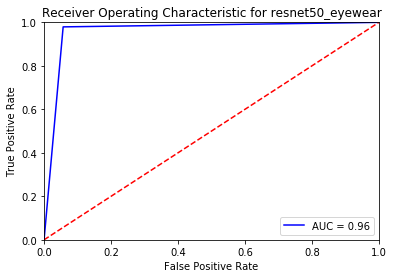

        Pred_0  Pred_1
True_0     298      18
True_1       7     330
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       316
           1       0.95      0.98      0.96       337

    accuracy                           0.96       653
   macro avg       0.96      0.96      0.96       653
weighted avg       0.96      0.96      0.96       653



In [28]:
# test model on entire pic_df 
# hat
print('resnet50 hat model evaluation:')
model_evaluation.model_testing(pickle_file_path,'hat',resnet_model_path,file_path4_hat,
                              (224,224),None,preprocess_input, 'resnet50')
# beard
print('\n\nresnet50 beard model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'beard', resnet_model_path, file_path4_beard,
                              (224,224),None,preprocess_input, 'resnet50')
# eyewear
print('\n\nresnet50 eyewear model evaluation:')
model_evaluation.model_testing(pickle_file_path, 'eyewear', resnet_model_path, file_path4_eyewear,
                              (224,224),None,preprocess_input, 'resnet50')

Found 653 validated image filenames belonging to 2 classes.


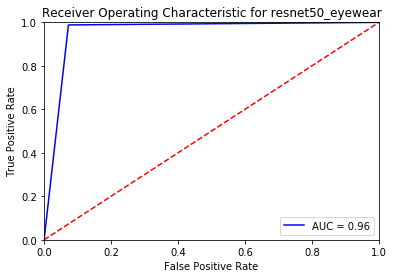

        Pred_0  Pred_1
True_0     293      23
True_1       4     333
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       316
           1       0.94      0.99      0.96       337

    accuracy                           0.96       653
   macro avg       0.96      0.96      0.96       653
weighted avg       0.96      0.96      0.96       653



In [30]:
model_evaluation.model_testing(pickle_file_path,'eyewear','../tuning_data/resnet_data/resnet50_model_5_up.json',
             '../tuning_data/resnet_data/untracked_resnet50/best_resnet50_model_eyewear.h5',(224,224),
                               None, preprocess_input, 'resnet50')
# stay with this 

### Best VGG model for eyewear

Found 653 validated image filenames belonging to 2 classes.


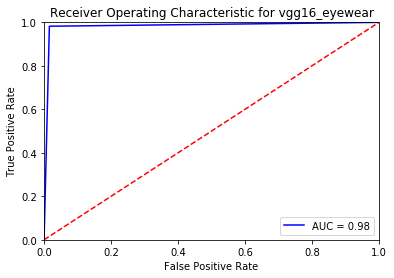

        Pred_0  Pred_1
True_0     311       5
True_1       6     331
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       316
           1       0.99      0.98      0.98       337

    accuracy                           0.98       653
   macro avg       0.98      0.98      0.98       653
weighted avg       0.98      0.98      0.98       653



In [31]:
model_evaluation.model_testing(pickle_file_path,'eyewear','../tuning_data/VGG_16_tuning/vgg_model.json', 
              '../tuning_data/VGG_16_tuning/best_vgg16_model_eyewear.h5',
              (150,150),1./255, process_func_v, 'vgg16')
# stay with this

### Best resnethat

Found 653 validated image filenames belonging to 2 classes.


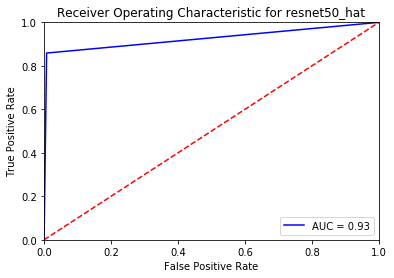

        Pred_0  Pred_1
True_0     395       3
True_1      36     219
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       398
           1       0.99      0.86      0.92       255

    accuracy                           0.94       653
   macro avg       0.95      0.93      0.94       653
weighted avg       0.94      0.94      0.94       653



In [33]:
model_evaluation.model_testing(pickle_file_path,'hat','../tuning_data/resnet_data/resnet50_model_5_up.json',
             '../tuning_data/resnet_data/untracked_resnet50/best_resnet50_model_hat.h5',(224,224),
                               None, preprocess_input, 'resnet50')
# stay with this 

### Best VggModelforhat

Found 653 validated image filenames belonging to 2 classes.


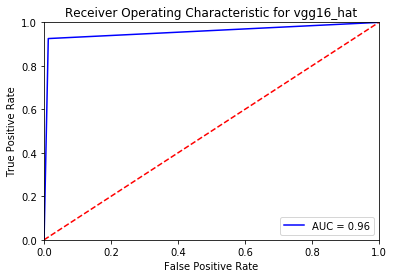

        Pred_0  Pred_1
True_0     393       5
True_1      19     236
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       398
           1       0.98      0.93      0.95       255

    accuracy                           0.96       653
   macro avg       0.97      0.96      0.96       653
weighted avg       0.96      0.96      0.96       653



In [35]:
model_evaluation.model_testing(pickle_file_path,'hat','../tuning_data/VGG_16_tuning/vgg_model.json', 
              '../tuning_data/VGG_16_tuning/best_vgg16_model_hat.h5',
              (150,150),1./255, process_func_v, 'vgg16')
# replace with the other one 

### Best resnet50 beard model

Found 653 validated image filenames belonging to 2 classes.


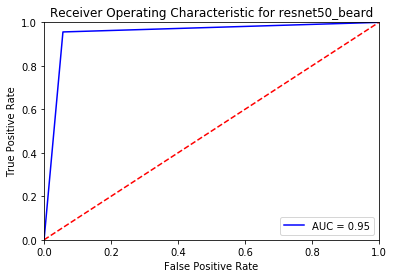

        Pred_0  Pred_1
True_0     402      24
True_1      10     217
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       426
           1       0.90      0.96      0.93       227

    accuracy                           0.95       653
   macro avg       0.94      0.95      0.94       653
weighted avg       0.95      0.95      0.95       653



In [32]:
model_evaluation.model_testing(pickle_file_path,'beard','../tuning_data/resnet_data/resnet50_model_5_up.json',
             '../tuning_data/resnet_data/untracked_resnet50/best_resnet50_model_beard.h5',(224,224),
                               None, preprocess_input, 'resnet50')
# stay with this model 

### best VGG beard model:

Found 653 validated image filenames belonging to 2 classes.


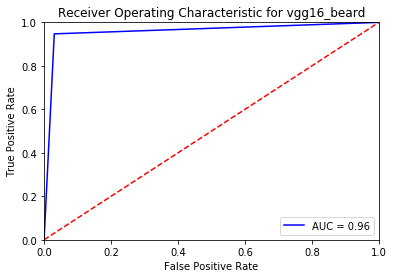

        Pred_0  Pred_1
True_0     413      13
True_1      12     215
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       426
           1       0.94      0.95      0.95       227

    accuracy                           0.96       653
   macro avg       0.96      0.96      0.96       653
weighted avg       0.96      0.96      0.96       653



In [34]:
model_evaluation.model_testing(pickle_file_path,'beard','../tuning_data/VGG_16_tuning/vgg_model.json', 
              '../tuning_data/VGG_16_tuning/best_vgg16_model_beard.h5',
              (150,150),1./255, process_func_v, 'vgg16')
# go with new one